http://cal.cs.illinois.edu/~johannes/research/LS_line_intersect.pdf
OR 
https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection#n-line_intersection

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json
from math import pi
import os
import re
import glob

%pylab inline
pylab.rc('xtick', labelsize=12) 
pylab.rc('ytick', labelsize=12) 
pylab.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


C:\Users\Matteo\Anaconda3\envs\py35\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pi']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Current position fetched:  nord
Fetched files:
nord\id_1_command_nord_ts_2017-12-19_14-54-18_nordest.json
nord\id_1_command_nord_ts_2017-12-19_14-46-29_nordovest.json
nord\id_1_command_nord_ts_2017-12-19_14-40-00_sudest.json
nord\id_1_command_nord_ts_2017-12-19_14-26-37_sudovest.json
{'nordest': 261.909473759795, 'sudest': 331.6474679518551, 'nordovest': 88.3525320481449, 'sudovest': 30.0}


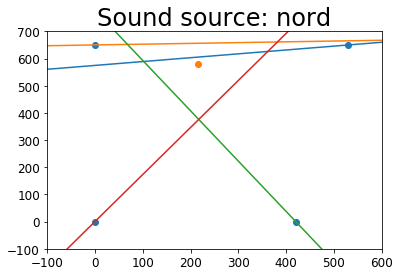

Current position fetched:  sud
Fetched files:
sud\id_1_command_sud_ts_2017-12-19_14-55-34_nordest.json
sud\id_1_command_sud_ts_2017-12-19_14-56-53_nordovest.json
sud\id_1_command_sud_ts_2017-12-19_14-38-51_sudest.json
sud\id_1_command_sud_ts_2017-12-19_14-31-15_sudovest.json
{'nordest': 194.79070792217163, 'sudest': 261.909473759795, 'nordovest': 151.6474679518551, 'sudovest': 120.0}


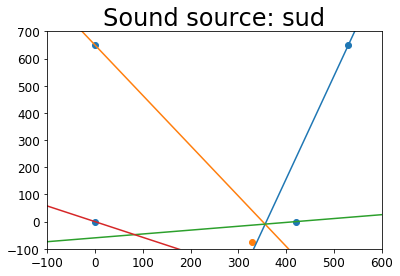

Current position fetched:  ovest
Fetched files:
ovest\id_1_command_ovest_ts_2017-12-19_14-58-27_nordest.json
ovest\id_1_command_ovest_ts_2017-12-19_14-43-37_nordovest.json
ovest\id_1_command_ovest_ts_2017-12-19_14-37-50_sudest.json
ovest\id_1_command_ovest_ts_2017-12-19_14-27-38_sudovest.json
{'nordest': 241.6474679518551, 'sudest': 300.0, 'nordovest': 158.09052624020495, 'sudovest': 358.3525320481449}


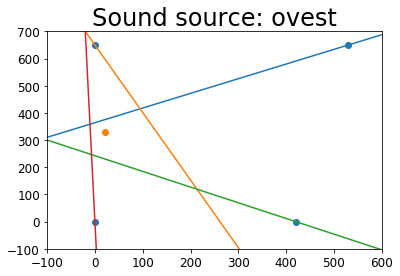

Current position fetched:  est
Fetched files:
est\id_1_command_est_ts_2017-12-19_14-50-33_nordest.json
est\id_1_command_est_ts_2017-12-19_14-45-45_nordovest.json
est\id_1_command_est_ts_2017-12-19_14-38-06_sudest.json
est\id_1_command_est_ts_2017-12-19_14-27-19_sudovest.json
{'nordest': 194.79070792217163, 'sudest': 30.0, 'nordovest': 120.0, 'sudovest': 61.647467951855106}


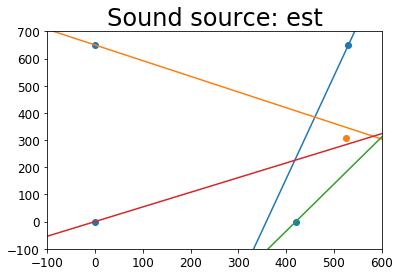

Current position fetched:  centro
Fetched files:
centro\id_1_command_centro_ts_2017-12-14_11-20-28_nordest.json
centro\id_1_command_centro_ts_2017-12-14_11-24-09_nordovest.json
centro\id_1_command_centro_ts_2017-12-14_11-26-45_sudest.json
centro\id_1_command_centro_ts_2017-12-14_11-32-07_sudovest.json
{'nordest': 225.20929207782842, 'sudest': 315.20929207782837, 'nordovest': 120.0, 'sudovest': 30.0}


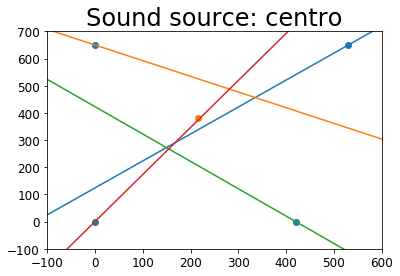

In [11]:
positions = ["nord", "sud", "ovest", "est", "centro"]
mics = ["nordest", "nordovest", "sudest", "sudovest"]

#starting points
x = [530,0,420,0] 
y = [650,650,0,0]


for p in positions:
    print("Current position fetched: ", p)
    directions = dict()
    print("Fetched files:")
    for m in mics:
        for name in glob.glob("{}/*{}.json".format(p,m)):
            print(name)
            with open(name) as json_data:
                directions[m] = json.load(json_data)["position"]  
    print(directions)
    #y = mx + q
    #compute m
    m =[np.tan(((-directions[m]+90)%360)*(pi/180))  for m in mics]
    N = np.zeros(shape = (4,2))
    points = np.array([y,x])
    for i in range(0,len(m)):
        N[i] = np.array([m[i],1])/ np.linalg.norm(np.array([m[i],1])) 
    N = N.T

    #compute R and q
    I  = np.array([[1,0],[0,1]])
    R = np.zeros(shape = I.shape)
    q = np.zeros(shape = (2,1))
    for c in range(N.shape[1]):
        R += I - (np.dot(N[:,c].reshape(2,1),N[:,c].reshape(1,2)))
        q += np.dot(I - (np.dot(N[:,c].reshape(2,1),N[:,c].reshape(1,2))),points[:,c].reshape(2,1))

    #compute p_hat
    p_hat = np.dot(np.linalg.inv(R), q)

    plt.title("Sound source: {}".format(p))
    plt.scatter(x, y)
    plt.scatter(p_hat[1],p_hat[0])
    plt.axis([-100,600,-100,700])
    #directional vector
    for r in range(4):
        plot_x = []
        plot_y = []
        p_x = x[r]
        p_y = y[r]
        for t in range(-1000, 1000):
            plot_x.append(p_x + t*N[:,r][1])
            plot_y.append(p_y + t*N[:,r][0])
        plt.plot(plot_x,plot_y)
    plt.savefig(p, fontsize = 20)
    plt.show()